<a href="https://colab.research.google.com/github/RamyaGuru/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/AtomVisionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example to run [AtomVision](https://github.com/usnistgov/atomvision)

# Table of Contents
1. Install [AtomVision](https://github.com/usnistgov/atomvision) package
2. Train DenseNet classification model on JARVIS-DFT 2D STEM image dataset
3. Plot example images from each heuristic image class

# Get the repository and install

In [8]:
!rm -rf atomvision
import os
!git clone https://github.com/usnistgov/atomvision.git
os.chdir('atomvision')
!python setup.py develop

Cloning into 'atomvision'...
remote: Enumerating objects: 1480, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 1480 (delta 9), reused 21 (delta 7), pack-reused 1453
Receiving objects: 100% (1480/1480), 191.09 MiB | 33.18 MiB/s, done.
Resolving deltas: 100% (215/215), done.
running develop
running egg_info
creating atomvision.egg-info
writing atomvision.egg-info/PKG-INFO
writing dependency_links to atomvision.egg-info/dependency_links.txt
writing requirements to atomvision.egg-info/requires.txt
writing top-level names to atomvision.egg-info/top_level.txt
writing manifest file 'atomvision.egg-info/SOURCES.txt'
adding license file 'LICENSE.md'
writing manifest file 'atomvision.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/atomvision.egg-link (link to .)
Removing atomvision 2021.10.11 from easy-install.pth file
Adding atomvision 2021.10.11 to easy-install.pth file

Installed /conte

# Train DenseNet pretrained model on JARVIS-DFT 2D materials' STEM images generated with convolution approximation

Datasets can be generated with STM/STEM sections of the data folder with generate_data.py script or pre-populated image datasets can be downloaded with 'download.py`. We create two folders train_folder, ``test_folder`` with sub-folders ``0,1,2,3,4,...`` for individual classes and they contain images for these classes in way train-test splits have proportionate amount of images. An example for using pre-trained densenet on STEM JARVIS-DFT 2D dataset is given below. Change ``train_folder`` and ``test_folder`` paths in order to use a different dataset.

NOTE: having trouble changing number of epochs. Seems to be reading as a string.

In [9]:
#!python atomvision/scripts/train_classifiers.py --model_name densenet --train_folder atomvision/data/classification/stem_jv2d/train_folder --test_folder atomvision/data/classification/stem_jv2d/test_folder
#!python atomvision/data/

# Example Plots in Each Heuristic Image Class

The convolutional neural network classifies the structures into 5 categories. Here, we print out example images from each category to look at their shared characteristics. Each image is labelled here with its composition and space group.

In [10]:
import matplotlib.pyplot as plt
import os
from IPython.display import display, HTML

#List the class sub-folders generated by the neural network
test_folder = "atomvision/data/classification/stem_jv2d/test_folder/"

os.listdir(test_folder)

['3', '4', '0', '1', '2']

In [15]:
!pip install -U jarvis-tools
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import data
dft_2d = data("dft_2d")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 8.20M/8.20M [00:00<00:00, 10.4MiB/s]


Loading the zipfile...
Loading completed.


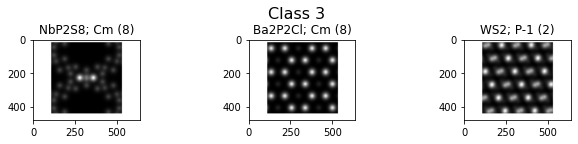

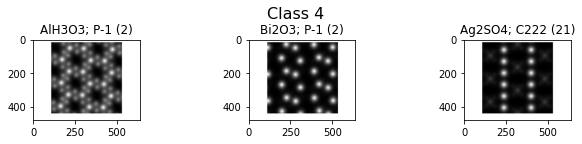

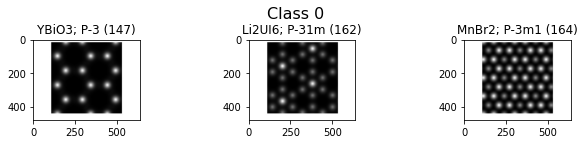

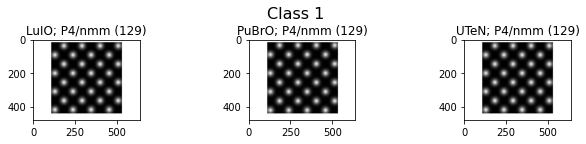

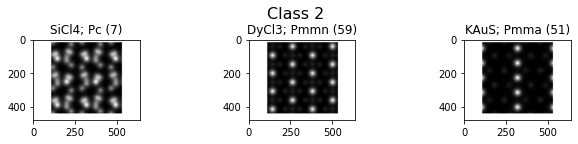

In [17]:
for cls in os.listdir(test_folder):
  fig, ax = plt.subplots(1,3, figsize = (9,2))
  fig.tight_layout(w_pad = 2)
  fig.subplots_adjust(top=0.75)
  fig.suptitle('Class {}'.format(cls), fontsize=16)
  i = 1
  for img in os.listdir(test_folder + cls)[:3]:
    plt.subplot(1,3,i)
    plt.imshow(plt.imread(test_folder + cls + "/" + img))
    start = img.find('JVASP')
    end = img.find('.jpg')
    jid = img[start:end]
    entry = next(j for j in dft_2d if j["jid"] == jid)
    atoms = Atoms.from_dict(entry["atoms"])
    comp = atoms.composition.reduced_formula
    spg = atoms.spacegroup()
    plt.title("{}; {}".format(comp, spg)) #Label by composition and space group.
    i = i+1